In [5]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import time
from sklearn.model_selection import train_test_split


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

x_train = (x_train - mean_px) / std_px
x_test = (x_test - mean_px) / std_px

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)


print(np.array(x_train).shape)
print(np.array(x_test).shape)



histories = []

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        try: 
            test_loss, test_accuracy = model.evaluate(x_test, y_test,)
            histories[-1].append(test_accuracy)
            if float(test_accuracy) > 0.99:
                print("\nReached 99% test accuracy, stopping training.")
                self.model.stop_training = True
        except Exception as e:
            print(f"An error of type {type(e).__name__} occurred.")

model = tf.keras.models.Sequential([
    layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.Dropout(0.1),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(8, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(8, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(8, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(8, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

print(model.summary())

times = []

for i in range(10):
    histories.append([])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    t1 = time.time()
    history = model.fit(x_train, y_train, batch_size = 32, epochs=100, validation_data=(x_val, y_val), callbacks=[CustomCallback()])
    t2 = time.time()
    times.append(t2-t1)

print(histories)
print(times)

(60000, 28, 28, 1)
(5000, 28, 28, 1)


c:\Users\draar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 26, 26, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 11, 11, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 9, 9, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 9, 9, 8)        │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 7, 7, 8)        │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 5, 5, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 5, 5, 8)        │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         6,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,866 (38.54 KB)

 Trainable params: 9,706 (37.91 KB)

 Non-trainable params: 160 (640.00 B)

None
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.1055
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7417 - loss: 0.8624 - val_accuracy: 0.9686 - val_loss: 0.1034
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9768 - loss: 0.0751
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9584 - loss: 0.1464 - val_accuracy: 0.9796 - val_loss: 0.0607
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0506
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9687 - loss: 0.1054 - val_accuracy: 0.9860 - val_loss: 0.0443
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.0525
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9746 - loss: 0.0858 - val_accuracy: 0.9840 - val_loss: 0.0504
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0505
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9779 - loss: 0.0757 - 

45.50904374122619


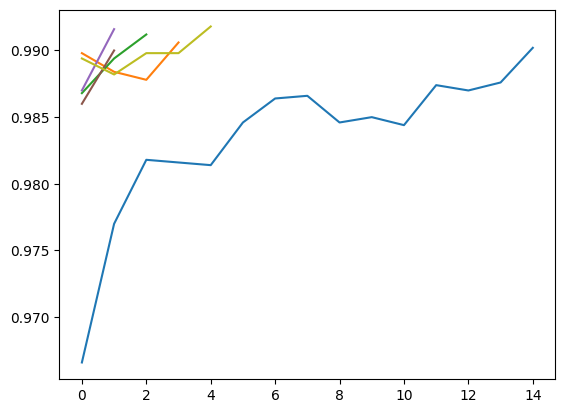

In [6]:
import matplotlib.pyplot as plt
data = histories
print(sum(times[1:])/len(times[1:]))
for i in data[1:]:
    plt.plot(i)
plt.show()